In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import time
import itertools

In [2]:
df = pd.read_csv("./data/RW_Graphs/df.csv")

In [4]:
df

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
0,DorAntifascista,False,2018-06-22 08:12:10+00:00,2074,2138,0,it,2022-08-31 15:04:03+00:00,0,Twitter for Android,1564992420714012672,@maurobiani @repubblica Due cuori e una Campag...,"['persone', 'migranti', 'Matrice']",1564987364946186242,maurobiani,NaN,NaN
1,maurobiani,False,2007-08-06 20:19:05+00:00,79692,4196,249,it,2022-08-31 14:43:58+00:00,989,Twitter Web App,1564987364946186242,#persone #migranti #salvini #meloni #CampagnaE...,"['persone', 'migranti', 'salvini', 'meloni', '...",1564987364946186242,NaN,NaN,NaN
2,bartolopietro1,True,2016-09-25 12:42:38+00:00,29646,61,45,it,2022-08-30 10:41:09+00:00,163,Twitter Web App,1564563868705329155,Bravo Angelo e complimenti a @Repubblica per a...,"['migranti', 'impegno', 'Lampedusa']",1564563868705329155,NaN,NaN,NaN
3,fratotolo2,False,2021-05-13 06:19:16+00:00,19710,233,144,it,2022-08-30 10:21:52+00:00,337,Twitter for iPhone,1564559016759533569,"Dal primo gennaio al 29 agosto, gli sbarchi di...",['migranti'],1564559016759533569,NaN,NaN,NaN
4,brunieradino,False,2011-11-07 16:10:19+00:00,223,276,0,it,2022-08-29 15:01:47+00:00,0,Twitter for iPhone,1564267073139838976,@fratotolo2 👉 non aiutandoli e non consentendo...,['migranti'],1563958254744518656,fratotolo2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,JackieMilesiF,False,2011-01-01 22:36:03+00:00,2139,2896,0,it,2020-11-13 12:20:16+00:00,0,Twitter for iPad,1327224759717941248,@SMaurizi Ho letto una parte dei cables che ha...,NaN,1327172894816940033,SMaurizi,NaN,NaN
138539,GCDileo,False,2011-11-05 08:06:40+00:00,337,415,1,it,2020-11-13 10:48:06+00:00,7,Twitter for Android,1327201567515303937,"@SMaurizi Grazie, considerando anche che la no...",NaN,1327172894816940033,SMaurizi,NaN,NaN
138540,microcerotis,False,2013-05-22 10:44:40+00:00,423,291,0,it,2020-11-13 09:57:35+00:00,0,Twitter Web App,1327188854848282624,@SMaurizi PUBLIC LIBRARY OF US DIPLOMACY\nhttp...,NaN,1327172894816940033,SMaurizi,NaN,NaN
138541,SMaurizi,False,2011-09-06 13:16:27+00:00,50018,3213,0,it,2020-11-13 09:26:07+00:00,6,Twitter Web App,1327180935738109953,@gianlufratta la ringrazio...,NaN,1327172894816940033,CosmolukaG,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138543 entries, 0 to 138542
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   User             138543 non-null  object
 1   verified         138543 non-null  bool  
 2   Date_Created     138543 non-null  object
 3   Follows_Count    138543 non-null  int64 
 4   Friends_Count    138543 non-null  int64 
 5   Retweet_Count    138543 non-null  int64 
 6   Language         138543 non-null  object
 7   Date_Tweet       138543 non-null  object
 8   Number_of_Likes  138543 non-null  int64 
 9   Source_of_Tweet  138543 non-null  object
 10  Tweet_Id         138543 non-null  int64 
 11  Tweet            138543 non-null  object
 12  Hashtags         9976 non-null    object
 13  Conversation_Id  138543 non-null  int64 
 14  In_reply_To      135500 non-null  object
 15  Coordinates      2957 non-null    object
 16  Place            2957 non-null    object
dtypes: bool(1)

Numero di users diversi

In [5]:
df["User"].nunique()

48262

Elaboriamo qualche statistica

In [6]:
df.describe()

,Follows_Count,Friends_Count,Retweet_Count,Number_of_Likes,Tweet_Id,Conversation_Id
count,1.385430e+05,138543.000000,138543.000000,138543.000000,1.385430e+05,1.385430e+05
mean,2.055309e+03,917.553489,0.598832,3.617332,1.425566e+18,1.422371e+18
std,3.594736e+04,2889.670462,10.022308,46.422393,9.099484e+16,1.013603e+17
min,0.000000e+00,0.000000,0.000000,0.000000,8.671290e+17,8.594970e+17
25%,3.300000e+01,95.000000,0.000000,0.000000,1.339636e+18,1.339530e+18
50%,1.730000e+02,319.000000,0.000000,0.000000,1.407699e+18,1.406562e+18
75%,6.760000e+02,913.000000,0.000000,1.000000,1.507423e+18,1.507284e+18
max,5.269050e+06,183380.000000,1201.000000,4920.000000,1.571699e+18,1.564987e+18


Mi creo la colonna Year_Month per poter fare alcune analisi, come ad esempio il numero di tweet che ho in ogni mese

In [3]:
df['Data_Tweet'] = pd.to_datetime(df['Date_Tweet']).dt.date
df.drop(["Date_Tweet"], axis=1, inplace=True)
df['Month'] = pd.to_datetime(df['Data_Tweet']).dt.month
df['Year'] = pd.to_datetime(df['Data_Tweet']).dt.year
df = df.sort_values(['Year','Month'], ascending=True)
df["Year_Month"] = df['Year'].apply(str) + "-" + df['Month'].apply(str)

In [8]:
df

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Data_Tweet,Month,Year,Year_Month
111196,TeresaFiorini,False,2015-01-20 14:37:09+00:00,20,231,0,it,0,Twitter for iPhone,869969193533399042,@pelton2013 @f_anfossi @fam_cristiana @oss_rom...,NaN,859497031458488320,pelton2013,NaN,NaN,2017-05-31,5,2017,2017-5
111197,UNICEF_Italia,True,2009-05-08 08:42:06+00:00,341700,1176,1,it,0,TweetDeck,867129039009579008,@pelton2013 @f_anfossi @fam_cristiana @oss_rom...,NaN,859497031458488320,pelton2013,NaN,NaN,2017-05-23,5,2017,2017-5
111192,Krono65,False,2010-11-08 18:59:52+00:00,222,305,0,it,0,Twitter for Android,879074011132678144,@pelton2013 @VoxPopuli2828 @TommyBrain @f_anfo...,NaN,859497031458488320,pelton2013,NaN,NaN,2017-06-25,6,2017,2017-6
111193,QueenDidodotOrg,False,2013-10-05 17:36:54+00:00,349,211,0,it,0,Twitter for Android,875626789405474816,@pelton2013 @TommyBrain @f_anfossi @fam_cristi...,NaN,859497031458488320,pelton2013,NaN,NaN,2017-06-16,6,2017,2017-6
111194,QueenDidodotOrg,False,2013-10-05 17:36:54+00:00,349,211,0,it,0,Twitter for Android,875626604604477441,@pelton2013 @TommyBrain @f_anfossi @fam_cristi...,NaN,859497031458488320,pelton2013,NaN,NaN,2017-06-16,6,2017,2017-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435,bralex84,False,2013-09-11 19:07:59+00:00,715,3835,1,it,0,Twitter for Android,1565329534018154498,@adriano_savio Queste che ha appena elencato r...,NaN,1289998032864346113,adriano_savio,NaN,NaN,2022-09-01,9,2022,2022-9
119921,LUCIaS_SIRO,False,2020-11-03 14:16:16+00:00,573,768,0,it,0,Twitter for Android,1565270780417609728,@VittorioDeSant7 @paola_demicheli Finché trova...,NaN,1313242941431918605,VittorioDeSant7,NaN,NaN,2022-09-01,9,2022,2022-9
134261,Luisito28442925,False,2020-02-18 04:39:38+00:00,37,7,0,it,0,Twitter for Android,1565435926020595715,@Silrath @PaolaCabezasC Burrolasso,NaN,1564984640221417475,Silrath,NaN,NaN,2022-09-01,9,2022,2022-9
134262,GeorgeVizueta,False,2011-11-18 02:51:40+00:00,214,1839,0,it,0,Twitter Web App,1565192258462384129,@Silrath @PaolaCabezasC Adelante Paola.,NaN,1564984640221417475,Silrath,NaN,NaN,2022-09-01,9,2022,2022-9


Elimino tweet che allunga serie temporale senza particolare risultanza per l'analisi

In [4]:
for i in df.index:
    if df['Conversation_Id'][i] == 859497031458488320:
        df = df.drop(labels=i, axis=0)

In [5]:
df_count = df['Year_Month'].value_counts(sort=False).rename_axis('Year_Month').reset_index(name='Tweets_Counts')
df_count.head(60)

,Year_Month,Tweets_Counts
0,2019-9,2
1,2019-10,3
2,2019-11,1
3,2020-1,1
4,2020-2,4
5,2020-3,1
6,2020-4,1
7,2020-6,2
8,2020-7,1
9,2020-8,1106


Faccio plot time series

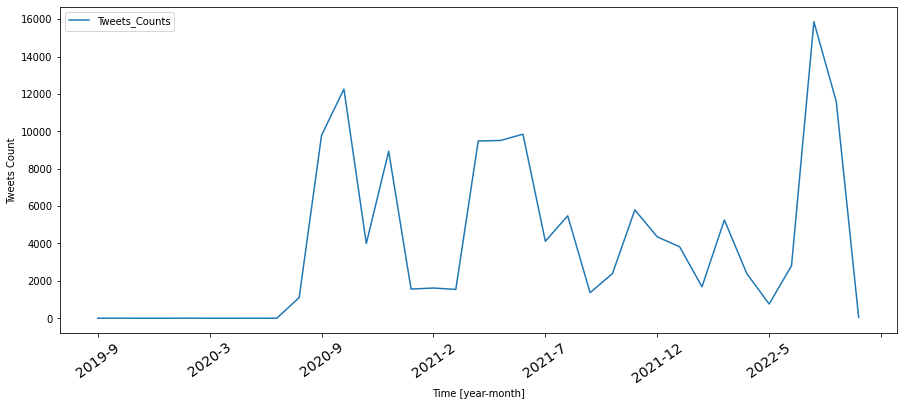

In [7]:

df_count.plot(x='Year_Month', y='Tweets_Counts',figsize=(15, 6),xlabel="Time [year-month]", ylabel="Tweets Count");

plt.xticks(rotation=35,fontsize=14)
plt.savefig('./plots/tweets_time.pdf',format='pdf')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

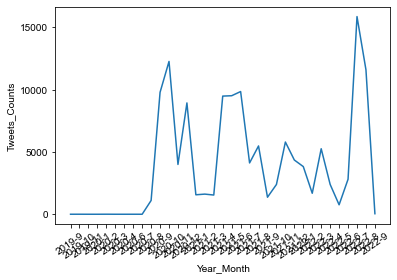

In [11]:
sns.lineplot(data = df_count, x='Year_Month', y='Tweets_Counts')
sns.set_theme(rc={'figure.figsize':(50,10)}, font_scale=1.5)
plt.xticks(rotation=35)

In [12]:
df = df.sort_values("Data_Tweet", ascending=False)

In [13]:
#df.drop(["Year"], axis=1, inplace=True)
#df.drop(["Month"], axis=1, inplace=True)
#df.drop(["Year_Month"], axis=1, inplace=True)

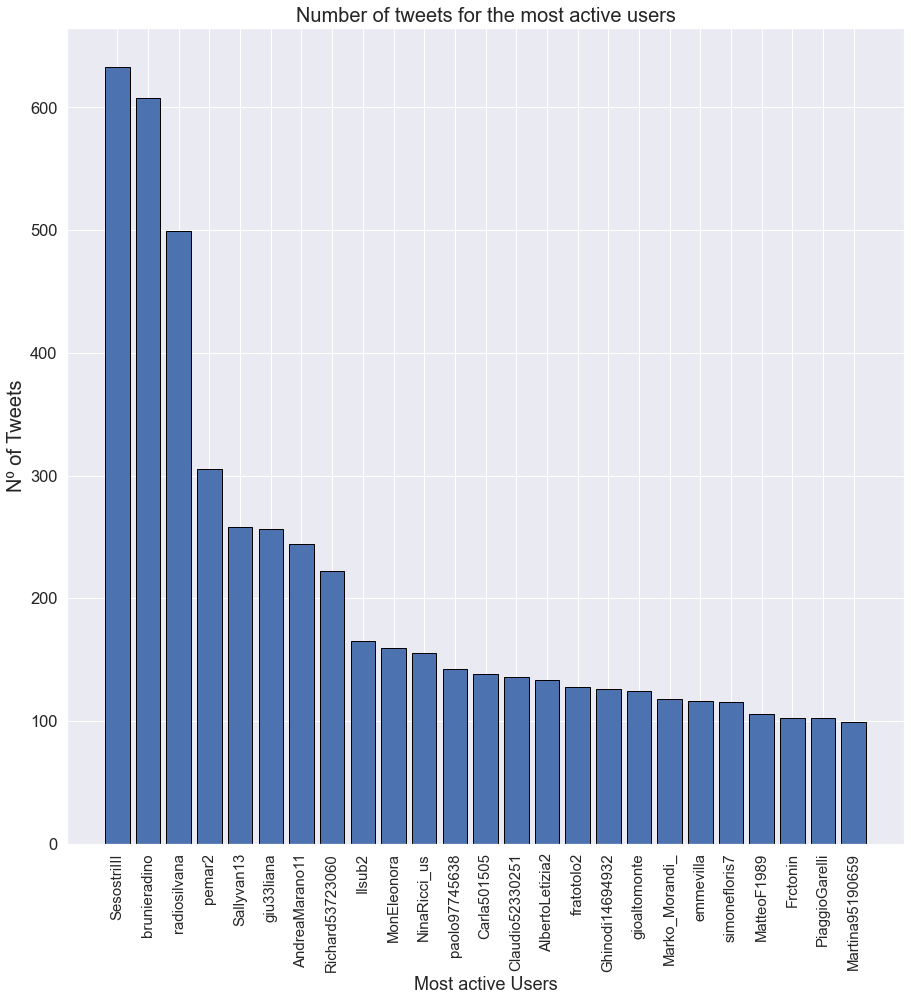

In [14]:
usertweets = df.groupby('User')

#Taking the top 25 tweeting users

top_users = usertweets.count()['Tweet'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])

fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
#plt.savefig('Tweets_of_active_users.jpg')
plt.show()

Analizzando il grafo corrispondente al dataset su Gephi ci siamo accorti che mancavano alcuni tweet source che ci rendevano impossibile avere informazioni su utenti che si comportavano da hub nel nostro netwrok. Per questo andiamo a recuperare tali tweet

In [15]:
lost_id=[]
for id in set(df.Conversation_Id):
    if id not in set(df.Tweet_Id):
        lost_id.append(id)

In [16]:
#inizializzo lista
attributes_container = []
max_tweet = 100000

for j, id in enumerate(lost_id):
    min_id = id-1
#faccio scraping e uso enumerate per tenere conto dei tweet
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('since_id:'+ str(min_id) + ' max_id:' + str(id) +' (filter:safe OR -filter:safe').get_items()):
        #print(tweet.content)
        #print('')
        if i>max_tweet:
            break
        attributes_container.append([tweet.user.username,
                                 tweet.user.verified,
                                 tweet.user.created,
                                 tweet.user.followersCount, #persone che seguono l'utente
                                 tweet.user.friendsCount, #persone seguite dall'utente
                                 tweet.retweetCount,
                                 tweet.lang,
                                 tweet.date,
                                 tweet.likeCount,
                                 tweet.sourceLabel,
                                 tweet.id,
                                 tweet.content,
                                 tweet.hashtags,
                                 tweet.conversationId,
                                 tweet.inReplyToUser,
                                 tweet.coordinates,
                                 tweet.place])
    
#Creo df
lostest_id = pd.DataFrame(attributes_container, columns=["User",
                                                "verified",
                                                "Date_Created",
                                                "Follows_Count",
                                                "Friends_Count",
                                                "Retweet_Count",
                                                "Language",
                                                "Date_Tweet",
                                                "Number_of_Likes",
                                                "Source_of_Tweet",
                                                "Tweet_Id",
                                                "Tweet",
                                                "Hashtags",
                                                "Conversation_Id",
                                                "In_reply_To",
                                                "Coordinates",
                                                "Place"])

In [17]:
lostest_id

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place
0,GiorgiaMeloni,True,2010-04-07 15:43:26+00:00,1279344,928,143,it,2022-06-20 16:37:29+00:00,834,Twitter for iPhone,1538924006878887936,Tre navi ONG con 850 clandestini chiedono di s...,[BastaSbarchi],1538924006878887936,None,None,None
1,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495096,2007,155,it,2022-08-28 18:23:03+00:00,740,Twitter for iPhone,1563955335303421953,Sbarchi con la Lega al ministero dell’Interno ...,None,1563955335303421953,None,None,None
2,GiorgiaMeloni,True,2010-04-07 15:43:26+00:00,1279344,928,330,it,2022-08-19 07:47:42+00:00,1966,Twitter Media Studio,1560533954347892736,#Pronti a difendere i confini dell’Italia. FDI...,"[Pronti, BloccoNavale]",1560533954347892736,None,None,None
3,bralex84,False,2013-09-11 19:07:59+00:00,714,3836,1,it,2020-08-02 18:54:32+00:00,21,Twitter Web App,1289998032864346113,Dopo essere passato alla #storia come colui ch...,"[storia, pisteciclabili, Avezzano, Vasto]",1289998032864346113,None,None,None
4,GiorgiaMeloni,True,2010-04-07 15:43:26+00:00,1279344,928,172,it,2022-08-07 13:10:57+00:00,1239,Twitter for iPhone,1556266648969117696,"Fermare le partenze dei barconi, in accordo co...",None,1556266648969117696,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,BaobabExp,False,2015-07-11 17:05:14+00:00,32799,537,290,it,2022-03-16 00:08:20+00:00,1148,Twitter Web App,1503885843802505216,"Non è possibile appellare ""eroi"" chi porta in ...","[Ucraina, Polonia, la7]",1503885843802505216,None,None,None
382,VillaFernando_,True,2018-09-13 19:44:13+00:00,146153,10370,1277,es,2022-03-06 23:21:31+00:00,2176,Twitter for iPhone,1500612571598045184,URGENTE| Hablando de vuelos humanitarios. Fisc...,None,1500612571598045184,None,None,None
383,Expresoec,True,2009-04-24 21:33:44+00:00,997620,590,614,es,2021-03-09 12:58:38+00:00,875,Twitter for Advertisers.,1369271410099634178,Los candidatos del correísmo aseguran haber re...,None,1369271410099634178,None,None,None
384,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495096,2007,315,it,2021-08-02 13:52:09+00:00,1448,Twitter for iPhone,1422193503820464130,"Ci sono due Ong straniere, la Ocean Viking e l...",None,1422193503820464130,None,None,None


In [18]:
lostest_id['Data_Tweet'] = pd.to_datetime(lostest_id['Date_Tweet']).dt.date
lostest_id.drop(["Date_Tweet"], axis=1, inplace=True)
lostest_id['Month'] = pd.to_datetime(lostest_id['Data_Tweet']).dt.month
lostest_id['Year'] = pd.to_datetime(lostest_id['Data_Tweet']).dt.year
lostest_id = lostest_id.sort_values(['Year','Month'], ascending=True)
lostest_id["Year_Month"] = lostest_id['Year'].apply(str) + "-" + lostest_id['Month'].apply(str)

In [19]:
lostest_id

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Data_Tweet,Month,Year,Year_Month
90,PDesplazadosMX,False,2017-11-29 03:27:02+00:00,8208,1378,22,es,24,Twitter for iPhone,1145123250554511362,#Alerta Todo nuestro apoyo y respaldo al #Insp...,"[Alerta, InspectorNocturo, Cancun]",1145123250554511362,None,None,None,2019-06-30,6,2019,2019-6
285,AngeloTani,False,2012-03-19 12:07:06+00:00,5682,2075,21,it,34,Twitter for iPhone,1215259438619222016,⁉️Ma perché scappano tutti⁉️\n\n#ClimateEmerge...,"[ClimateEmergency, Zimbabwe]",1215259438619222016,None,None,None,2020-01-09,1,2020,2020-1
321,TarekeBrhane,False,2011-10-23 21:43:15+00:00,948,209,3,it,8,Twitter for Android,1274285729309503488,Una persona su 97nel mondo è in fuga da confli...,"[withRefugees, Blacklivesmatter]",1274285729309503488,None,None,None,2020-06-20,6,2020,2020-6
3,bralex84,False,2013-09-11 19:07:59+00:00,714,3836,1,it,21,Twitter Web App,1289998032864346113,Dopo essere passato alla #storia come colui ch...,"[storia, pisteciclabili, Avezzano, Vasto]",1289998032864346113,None,None,None,2020-08-02,8,2020,2020-8
75,MedicalScitech,False,2019-08-22 13:21:22+00:00,646,1,0,it,2,Twitter Web App,1289899874465480705,La tanto decantata #EZ è come quell'impianto e...,[EZ],1289899874465480705,None,None,None,2020-08-02,8,2020,2020-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,101,it,567,Twitter Web App,1554787555438206977,"52.987 richieste di asilo nel 2021, più della ...",None,1554787555438206977,None,None,None,2022-08-03,8,2022,2022-8
357,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,198,it,809,Twitter for iPhone,1559449339726110721,🔴 È quanto emerso dai dati contenuti nel dossi...,[BastaSbarchi],1559449339726110721,None,None,None,2022-08-16,8,2022,2022-8
358,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857293,266,12,it,42,Hootsuite Inc.,1557610324655841282,"Cnn, una montatura la versione russa sulla pri...",[ANSA],1557610324655841282,None,None,None,2022-08-11,8,2022,2022-8
360,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857295,266,39,it,77,Twitter Web App,1559864562735882245,La Cina invia truppe in Russia per un ciclo di...,[ANSA],1559864562735882245,None,None,None,2022-08-17,8,2022,2022-8


In [20]:
lostest_id.to_csv('lostest_id.csv', sep=',', index=False)

In [38]:
df_def=pd.concat([df, lostest_id])

In [39]:
df_def

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Data_Tweet,Month,Year,Year_Month
31060,nitewriter3,False,2022-07-14 23:47:29+00:00,2,20,0,it,0,Twitter for Android,1571699213720846337,@GiorgiaMeloni @FratellidItalia Chi permette ...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-19,9,2022,2022-9
31061,Christi09341475,False,2021-12-24 13:52:34+00:00,6,31,0,it,1,Twitter for iPhone,1571145153695588353,@GiorgiaMeloni @FratellidItalia No assolutamen...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-17,9,2022,2022-9
2882,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683600823287808,@ragge002 @eleloverre @matteosalvinimi Immigra...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
2883,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683119333961729,@ragge002 @eleloverre @matteosalvinimi Le cart...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
2878,ragge002,False,2022-05-12 09:59:04+00:00,1,45,0,it,0,Twitter for Android,1570697404068036609,@Blank40195976 @eleloverre @matteosalvinimi Il...,NaN,1563955335303421953,Blank40195976,NaN,NaN,2022-09-16,9,2022,2022-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,101,it,567,Twitter Web App,1554787555438206977,"52.987 richieste di asilo nel 2021, più della ...",None,1554787555438206977,None,None,None,2022-08-03,8,2022,2022-8
357,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,198,it,809,Twitter for iPhone,1559449339726110721,🔴 È quanto emerso dai dati contenuti nel dossi...,[BastaSbarchi],1559449339726110721,None,None,None,2022-08-16,8,2022,2022-8
358,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857293,266,12,it,42,Hootsuite Inc.,1557610324655841282,"Cnn, una montatura la versione russa sulla pri...",[ANSA],1557610324655841282,None,None,None,2022-08-11,8,2022,2022-8
360,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857295,266,39,it,77,Twitter Web App,1559864562735882245,La Cina invia truppe in Russia per un ciclo di...,[ANSA],1559864562735882245,None,None,None,2022-08-17,8,2022,2022-8


In [40]:
df_def.reset_index(inplace=True)
del(df_def['index'])
df_def

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Data_Tweet,Month,Year,Year_Month
0,nitewriter3,False,2022-07-14 23:47:29+00:00,2,20,0,it,0,Twitter for Android,1571699213720846337,@GiorgiaMeloni @FratellidItalia Chi permette ...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-19,9,2022,2022-9
1,Christi09341475,False,2021-12-24 13:52:34+00:00,6,31,0,it,1,Twitter for iPhone,1571145153695588353,@GiorgiaMeloni @FratellidItalia No assolutamen...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-17,9,2022,2022-9
2,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683600823287808,@ragge002 @eleloverre @matteosalvinimi Immigra...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
3,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683119333961729,@ragge002 @eleloverre @matteosalvinimi Le cart...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
4,ragge002,False,2022-05-12 09:59:04+00:00,1,45,0,it,0,Twitter for Android,1570697404068036609,@Blank40195976 @eleloverre @matteosalvinimi Il...,NaN,1563955335303421953,Blank40195976,NaN,NaN,2022-09-16,9,2022,2022-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137795,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,101,it,567,Twitter Web App,1554787555438206977,"52.987 richieste di asilo nel 2021, più della ...",None,1554787555438206977,None,None,None,2022-08-03,8,2022,2022-8
137796,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,198,it,809,Twitter for iPhone,1559449339726110721,🔴 È quanto emerso dai dati contenuti nel dossi...,[BastaSbarchi],1559449339726110721,None,None,None,2022-08-16,8,2022,2022-8
137797,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857293,266,12,it,42,Hootsuite Inc.,1557610324655841282,"Cnn, una montatura la versione russa sulla pri...",[ANSA],1557610324655841282,None,None,None,2022-08-11,8,2022,2022-8
137798,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857295,266,39,it,77,Twitter Web App,1559864562735882245,La Cina invia truppe in Russia per un ciclo di...,[ANSA],1559864562735882245,None,None,None,2022-08-17,8,2022,2022-8


In [25]:
#df_def.to_csv('df_def.csv', sep=',')

Si va adesso ad eliminare quegli utenti di cui non abbiamo informazioni (visualizzati su gephi). Tale problema è dato da utenti i quali figurano in risposta ad alcuni tweet ma che non presentano il proprio tweet. Per prima cosa mi cerco gli username che compaiono in reply ma che non compaiono invece il User. Poi vado ad eliminare i None value e rimuovo il primo valore che è Nan. A quel punto mi cerco tutte le righe del dataset che contengono quei username in reply e gli elimino

In [41]:
no_info = []
for user in set(df_def.In_reply_To):
    if user not in set(df_def.User):
        no_info.append(user)

In [42]:
len(no_info)

1442

In [43]:
for i, val in enumerate(no_info):
    if val == None:
        print(i)

850


In [44]:
no_info_new=[]
for i, elem in enumerate(no_info):
    if i == 0 or i == 850:
        continue
    else:
        no_info_new.append(elem)

In [45]:
r_to_be_del = []
for i in df_def.index:
    if df_def['In_reply_To'][i] in no_info_new:
        r_to_be_del.append(i)
df_def.drop(labels=r_to_be_del, axis=0, inplace=True)

In [46]:
df_def

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Number_of_Likes,Source_of_Tweet,Tweet_Id,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,Data_Tweet,Month,Year,Year_Month
0,nitewriter3,False,2022-07-14 23:47:29+00:00,2,20,0,it,0,Twitter for Android,1571699213720846337,@GiorgiaMeloni @FratellidItalia Chi permette ...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-19,9,2022,2022-9
1,Christi09341475,False,2021-12-24 13:52:34+00:00,6,31,0,it,1,Twitter for iPhone,1571145153695588353,@GiorgiaMeloni @FratellidItalia No assolutamen...,NaN,1538924006878887936,GiorgiaMeloni,NaN,NaN,2022-09-17,9,2022,2022-9
2,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683600823287808,@ragge002 @eleloverre @matteosalvinimi Immigra...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
3,Blank40195976,False,2016-06-04 22:27:20+00:00,6,29,0,it,0,Twitter for Android,1570683119333961729,@ragge002 @eleloverre @matteosalvinimi Le cart...,NaN,1563955335303421953,ragge002,NaN,NaN,2022-09-16,9,2022,2022-9
4,ragge002,False,2022-05-12 09:59:04+00:00,1,45,0,it,0,Twitter for Android,1570697404068036609,@Blank40195976 @eleloverre @matteosalvinimi Il...,NaN,1563955335303421953,Blank40195976,NaN,NaN,2022-09-16,9,2022,2022-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137795,matteosalvinimi,True,2011-03-23 10:32:56+00:00,1495095,2007,101,it,567,Twitter Web App,1554787555438206977,"52.987 richieste di asilo nel 2021, più della ...",None,1554787555438206977,None,None,None,2022-08-03,8,2022,2022-8
137796,FratellidItalia,True,2012-12-20 20:34:19+00:00,186737,422,198,it,809,Twitter for iPhone,1559449339726110721,🔴 È quanto emerso dai dati contenuti nel dossi...,[BastaSbarchi],1559449339726110721,None,None,None,2022-08-16,8,2022,2022-8
137797,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857293,266,12,it,42,Hootsuite Inc.,1557610324655841282,"Cnn, una montatura la versione russa sulla pri...",[ANSA],1557610324655841282,None,None,None,2022-08-11,8,2022,2022-8
137798,Agenzia_Ansa,True,2010-06-01 17:19:41+00:00,1857295,266,39,it,77,Twitter Web App,1559864562735882245,La Cina invia truppe in Russia per un ciclo di...,[ANSA],1559864562735882245,None,None,None,2022-08-17,8,2022,2022-8


Controllo nuovamente il numero dei dati mancanti ed esso è nettamente minore.

In [49]:
#df_def.to_csv('df_def.csv', sep=',', index=False)